# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

## 1. Cargamos los datos

In [3]:
df= pd.read_csv("./data/df_furniture.csv") 
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     326 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


## 2. Tratar la fecha como texto y parsear

In [5]:
df = pd.read_csv('./data/df_furniture.csv', parse_dates = ['Month'], index_col = 'Month')
df.head()

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


## 3. ¿De qué fecha a qué fecha va el histórico?

In [25]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', name='Month', length=331, freq=None)

Desde el 1 de enero de 1992 a el 7 de enero de 2019

## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

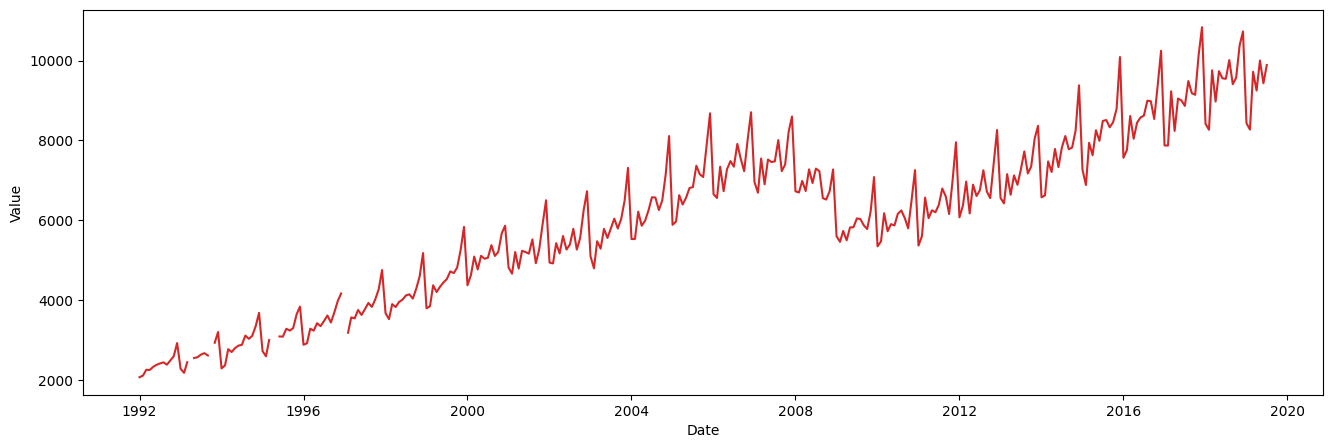

In [24]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['furniture_price_adjusted'])

Tendencia positiva y estacionalidad

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

- Si el p-value es mayor a 0.05, no se puede rechazar la hipótesis nula, lo que sugiere que la serie no es estacionaria.

- Si el ADF Statistic es mayor que cualquiera de los valores críticos, también indica no estacionariedad.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['furniture_price_adjusted'])
print("p-value:", result[1])

ADF Statistic: -1.1285507258736949
p-value: 0.7035529748089981
Critical Value 1%: -3.4512146067362317
Critical Value 5%: -2.870730188960711
Critical Value 10%: -2.5716664849383113


___

- Si el p-value es menor a 0.05, puedes concluir que la serie no es estacionaria.

- Si el KPSS Statistic es mayor que los valores críticos, esto también indica no estacionariedad.

In [12]:
from statsmodels.tsa.stattools import kpss

result_kpss = kpss(df['furniture_price_adjusted'], regression='c')
print("KPSS Statistic:", result_kpss[0])
print("p-value:", result_kpss[1])
for key, value in result_kpss[3].items():
    print('Critical Value {}: {}'.format(key, value))

KPSS Statistic: 2.555246987562725
p-value: 0.01
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739


C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_10128\1775686893.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(df['furniture_price_adjusted'], regression='c')


CONCLUSIÓN: La serie no es estacionaria.

## 6. ¿Conoces algún método para representar mejor la tendencia?

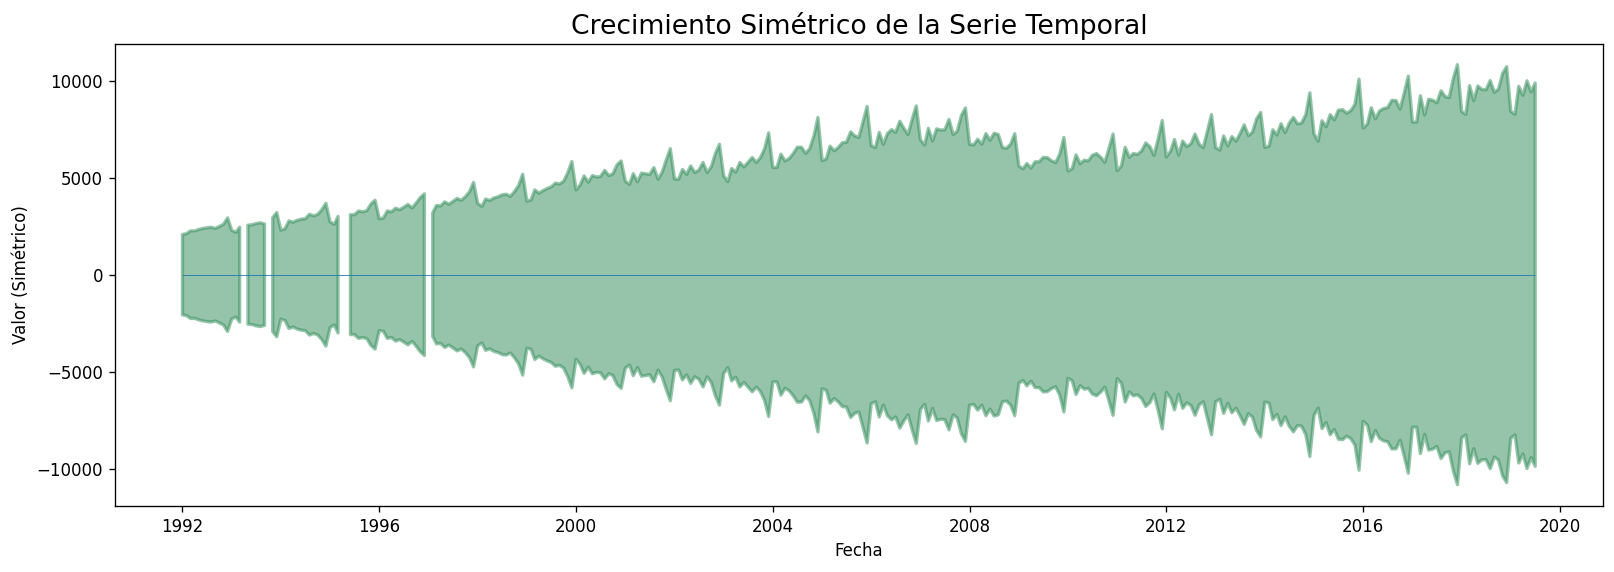

In [22]:
x = df.index
y = df['furniture_price_adjusted']

plt.figure(figsize=(16, 5), dpi=120)
plt.fill_between(x, y1=y, y2=-y, alpha=0.5, linewidth=2, color="seagreen")
plt.ylim(-1.1 * y.max(), 1.1 * y.max())
plt.title("Crecimiento Simétrico de la Serie Temporal", fontsize=16)
plt.hlines(y=0, xmin=x.min(), xmax=x.max(), linewidth=0.5)
plt.xlabel("Fecha")
plt.ylabel("Valor (Simétrico)")
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result_add = seasonal_decompose(df['furniture_price_adjusted'], model = 'additive')

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [28]:
duplicates = df.index.duplicated(keep=False)
df = df[~df.index.duplicated(keep='first')]
df = df.asfreq('MS')

In [30]:
df['furniture_price_adjusted'].fillna(method='ffill', inplace=True)

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_10128\2897156673.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['furniture_price_adjusted'].fillna(method='ffill', inplace=True)


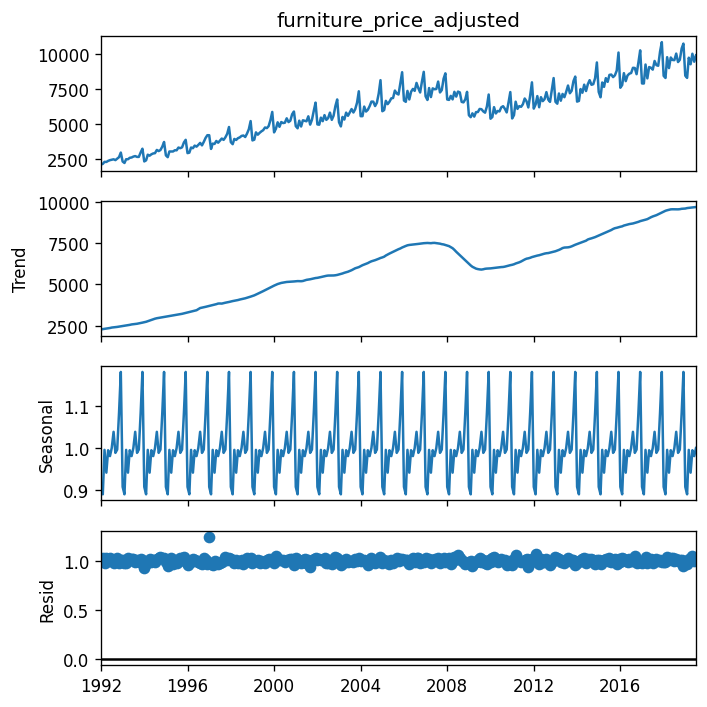

In [31]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['furniture_price_adjusted'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['furniture_price_adjusted'], model='additive', extrapolate_trend='freq')


plt.rcParams.update({'figure.figsize': (6, 6)})
result_mul.plot()
plt.show()

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

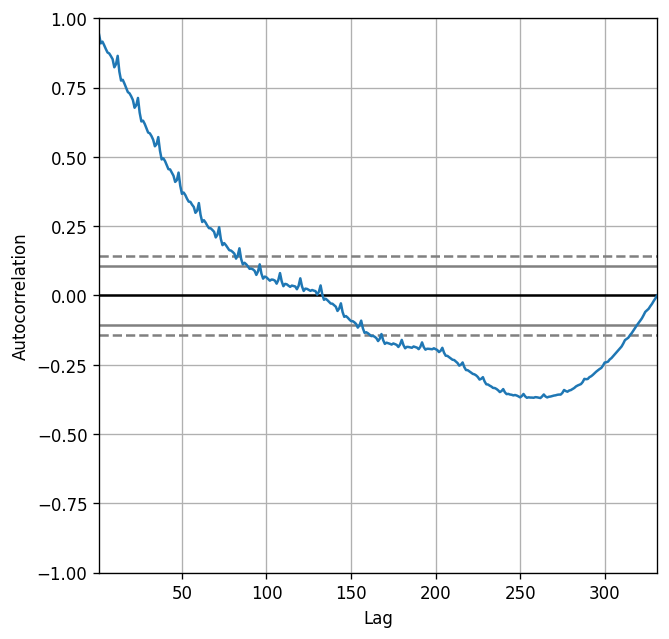

In [32]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['furniture_price_adjusted']);

## 9. ¿Qué dependencia tiene cada instante de sus últimos 5 lags? Demuéstralo mediante una matriz de correlación.

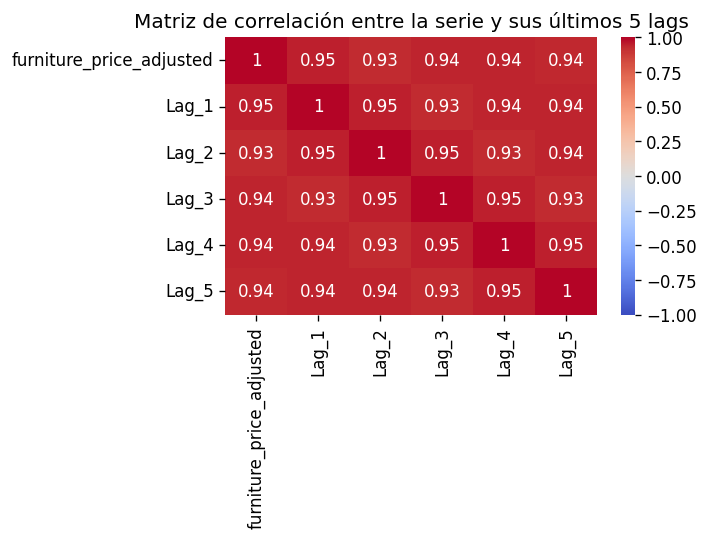

In [35]:
for lag in range(1, 6):
    df[f'Lag_{lag}'] = df['furniture_price_adjusted'].shift(lag)

df_lags = df.dropna()

plt.figure(figsize=(5, 3))
sns.heatmap(df_lags.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre la serie y sus últimos 5 lags')
plt.show()


## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

In [37]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1200x600 with 0 Axes>

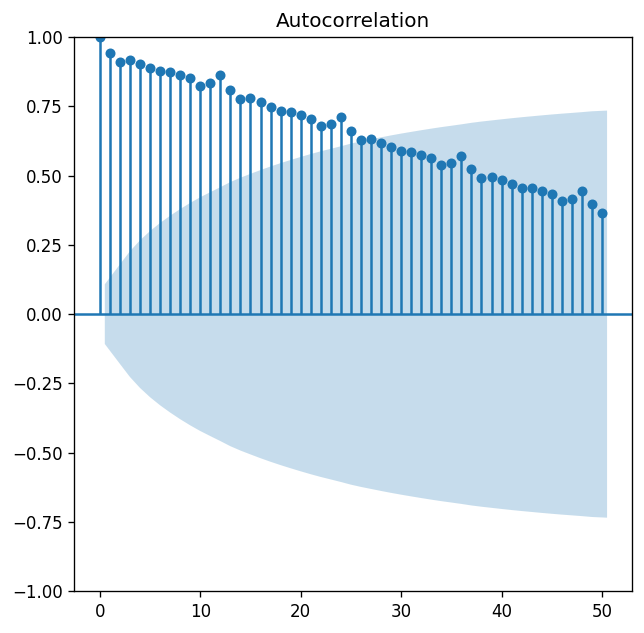

In [38]:
plt.figure(figsize=(10, 5))
plot_acf(df['furniture_price_adjusted'], lags=50)
plt.show()

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [40]:
from statsmodels.nonparametric.smoothers_lowess import lowess

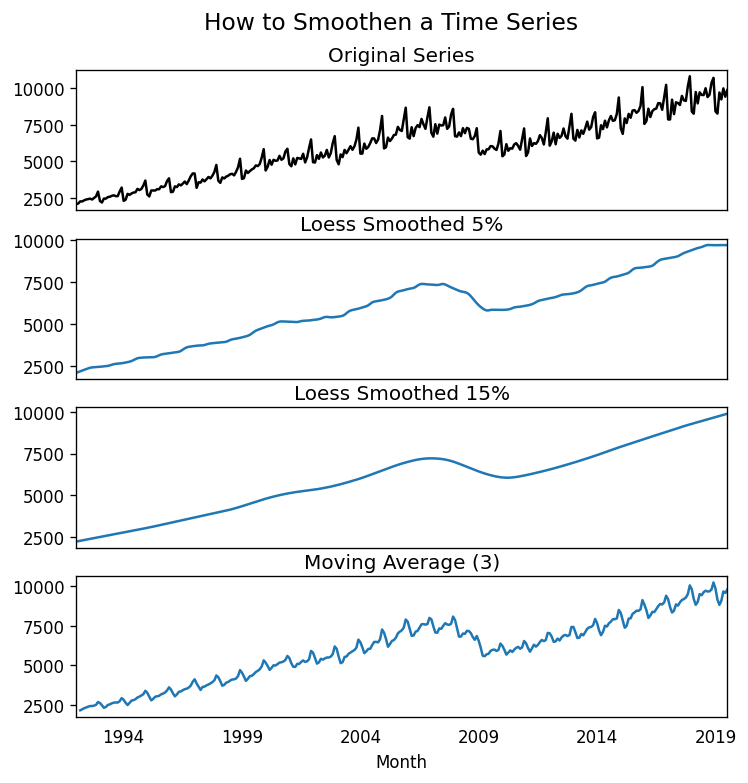

In [41]:
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

df_ma = df['furniture_price_adjusted'].rolling(3).mean()

df_loess_5 = pd.DataFrame(
    lowess(df['furniture_price_adjusted'], np.arange(len(df['furniture_price_adjusted'])), frac=0.05)[:, 1],
    index=df.index, columns=['furniture_price_adjusted']
)
df_loess_15 = pd.DataFrame(
    lowess(df['furniture_price_adjusted'], np.arange(len(df['furniture_price_adjusted'])), frac=0.15)[:, 1],
    index=df.index, columns=['furniture_price_adjusted']
)
fig, axes = plt.subplots(4, 1, figsize=(7, 7), sharex=True, dpi=120)
df['furniture_price_adjusted'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['furniture_price_adjusted'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['furniture_price_adjusted'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()